In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [9]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(
    scaled_data, 
    columns=df_market_data.columns
)


# Copy the crypto names from the original DataFrame
df_scaled['crypto_name'] = df_market_data.index

# Set the coin_id column as index
df_scaled.set_index('crypto_name', inplace=True)

# Display the scaled DataFrame
print(df_scaled.head())

              price_change_percentage_24h  price_change_percentage_7d  \
crypto_name                                                             
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
crypto_name                                                              
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Data.

In [10]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [12]:
# Create an empty list to store the inertia values
from sklearn.cluster import KMeans
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)

# 2. Fit the model to the data using `df_market_data_scaled`
kmeans.fit(df_scaled)
# 3. Append the model.inertia_ to the inertia list
inertia_values.append(kmeans.inertia_)

In [16]:
print("Inertia Values:", inertia_values)


Inertia Values: [24.1161984214092]


In [17]:
# Recompute inertia values
inertia_values = []  # Reset the list to avoid duplicates

for k in range(1, 12):  # k-values from 1 to 11
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)  # Replace with your scaled DataFrame variable
    inertia_values.append(kmeans.inertia_)

print("Recomputed Inertia Values:", inertia_values)


Recomputed Inertia Values: [287.0, 212.1233420748626, 170.19357087970303, 79.02243535120977, 71.0979135124442, 66.1088267804475, 54.48812315624117, 43.22469266658042, 32.86088447122681, 28.404884636873096, 24.116198421409198]


In [18]:
print("Length of k-values:", len(list(range(1, 12))))
print("Length of inertia_values:", len(inertia_values))


Length of k-values: 11
Length of inertia_values: 11


In [19]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": list(range(1, 12)),  # k-values
    "inertia": inertia_values  # Corrected inertia values
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the Elbow curve DataFrame
print("Elbow Curve Data:")
print(df_elbow)

Elbow Curve Data:
     k     inertia
0    1  287.000000
1    2  212.123342
2    3  170.193571
3    4   79.022435
4    5   71.097914
5    6   66.108827
6    7   54.488123
7    8   43.224693
8    9   32.860884
9   10   28.404885
10  11   24.116198


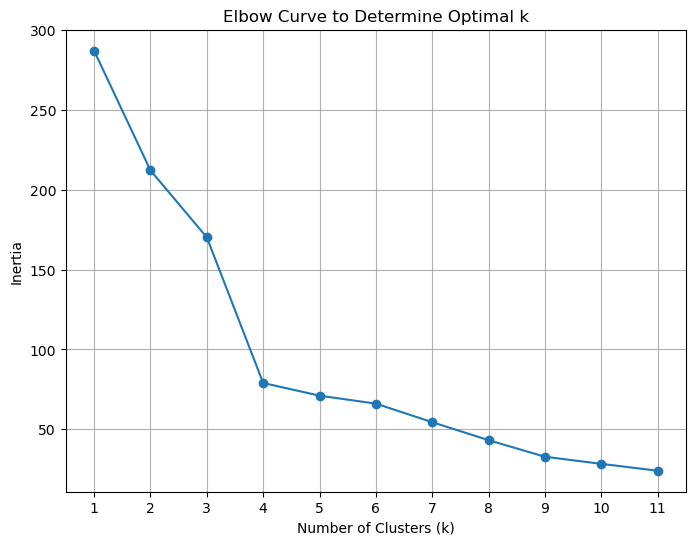

In [20]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

# Plot a line chart for the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(list(range(1, 12)), inertia_values, marker='o', linestyle='-')
plt.title("Elbow Curve to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, 12))  # Show all k-values on the x-axis
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [21]:
# Initialise the K-Means model using the best value for k
from sklearn.cluster import KMeans
best_k = 4 

In [22]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model = KMeans(n_clusters=best_k, random_state=42)
kmeans_model.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

In [23]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_labels = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
print("Cluster Labels:")
print(cluster_labels)

Cluster Labels:
[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [25]:
# Create a copy of the scaled DataFrame
df_scaled_copy = df_scaled.copy()

In [26]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_scaled_copy["Cluster"] = cluster_labels

# Display the copy of the scaled DataFrame
print("Copy of the Scaled DataFrame with Clusters:")
print(df_scaled_copy.head())

Copy of the Scaled DataFrame with Clusters:
              price_change_percentage_24h  price_change_percentage_7d  \
crypto_name                                                             
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
crypto_name                                                              
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   


In [27]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Colour the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

# Import hvPlot for visualization
import hvplot.pandas

# Create a scatter plot using hvPlot
scatter_plot = df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",  # Set x-axis to 24h price change
    y="price_change_percentage_7d",   # Set y-axis to 7d price change
    c="Cluster",                      # Colour points by cluster labels
    colormap="viridis",               # Choose a colormap
    hover_cols=["crypto_name"],       # Add the crypto name to hover information
    title="Cryptocurrency Clusters by Price Change",
    width=800,
    height=500
)

# Display the plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,crypto_name)

---

### Optimise Clusters with Principal Component Analysis.

In [28]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca_model = PCA(n_components=3)

In [29]:
# Use the PCA model with `fit_transform` to reduce the original scaled Dataframe
# down to three principal compopca_data = pca_model.fit_transform(df_scaled_copy.drop(columns=["Cluster"]))
pca_data = pca_model.fit_transform(df_scaled_copy.drop(columns=["Cluster"]))
df_pca = pd.DataFrame(
    pca_data,
    columns=["Principal Component 1", "Principal Component 2", "Principal Component 3"],
    index=df_scaled_copy.index
)

# View the scaled PCA data
print("PCA DataFrame:")
print(df_pca.head())

PCA DataFrame:
              Principal Component 1  Principal Component 2  \
crypto_name                                                  
bitcoin                   -0.600667               0.842760   
ethereum                  -0.458261               0.458466   
tether                    -0.433070              -0.168126   
ripple                    -0.471835              -0.222660   
bitcoin-cash              -1.157800               2.041209   

              Principal Component 3  
crypto_name                          
bitcoin                    0.461595  
ethereum                   0.952877  
tether                    -0.641752  
ripple                    -0.479053  
bitcoin-cash               1.859715  


In [30]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.

# Retrieve the explained variance ratio
explained_variance = pca_model.explained_variance_ratio_

# Display the explained variance for each principal component
print("Explained Variance Ratio:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {variance:.4f}")

# Calculate the cumulative explained variance
cumulative_variance = explained_variance.cumsum()

# Display the cumulative explained variance
print("\nCumulative Explained Variance:")
for i, variance in enumerate(cumulative_variance, start=1):
    print(f"Up to Principal Component {i}: {variance:.4f}")


Explained Variance Ratio:
Principal Component 1: 0.3720
Principal Component 2: 0.3470
Principal Component 3: 0.1760

Cumulative Explained Variance:
Up to Principal Component 1: 0.3720
Up to Principal Component 2: 0.7190
Up to Principal Component 3: 0.8950


In [31]:
# Calculate the total explained variance
total_explained_variance = explained_variance.sum()

# Display the total explained variance
print(f"Total Explained Variance of the Three Principal Components: {total_explained_variance:.4f}")


Total Explained Variance of the Three Principal Components: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950

In [32]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(
    pca_data,
    columns=["Principal Component 1", "Principal Component 2", "Principal Component 3"],
    index=df_scaled_copy.index  # Preserve the original index
)

# Copy the crypto names from the original scaled DataFrame
df_pca["crypto_name"] = df_scaled_copy.index

# Set the coin_id column as index
df_pca.set_index("crypto_name", inplace=True)


# Display the scaled PCA DataFrame
print("Scaled PCA DataFrame:")
print(df_pca.head())


Scaled PCA DataFrame:
              Principal Component 1  Principal Component 2  \
crypto_name                                                  
bitcoin                   -0.600667               0.842760   
ethereum                  -0.458261               0.458466   
tether                    -0.433070              -0.168126   
ripple                    -0.471835              -0.222660   
bitcoin-cash              -1.157800               2.041209   

              Principal Component 3  
crypto_name                          
bitcoin                    0.461595  
ethereum                   0.952877  
tether                    -0.641752  
ripple                    -0.479053  
bitcoin-cash               1.859715  


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [33]:
# Create a list with the number of k-values from 1 to 11
from sklearn.cluster import KMeans
k_values = list(range(1, 12))

In [34]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):  # k-values from 1 to 11
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using `df_pca`
    kmeans.fit(df_pca)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

In [35]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": list(range(1, 12)),  # k-values from 1 to 11
    "inertia": inertia_values  # Inertia values computed earlier
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

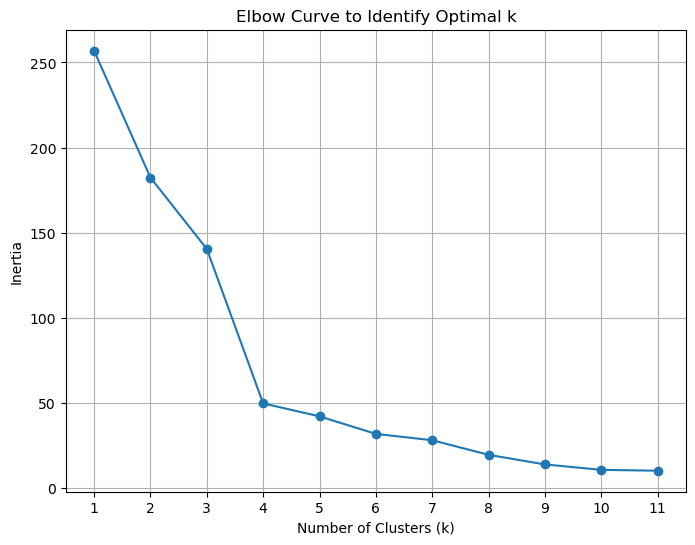

In [36]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o', linestyle='-')
plt.title("Elbow Curve to Identify Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(df_elbow["k"])  # Ensure all k-values are displayed on the x-axis
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [37]:
# Initialise the K-Means model using the best value for k
from sklearn.cluster import KMeans
best_k = 4 

In [38]:
# Fit the K-Means model using the scaled PCA DataFrame
kmeans_model = KMeans(n_clusters=best_k, random_state=42)
kmeans_model.fit(df_pca)

KMeans(n_clusters=4, random_state=42)

In [39]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
df_pca["Cluster"] = cluster_labels

# Print the resulting array of cluster values.
print(df_pca.head())

              Principal Component 1  Principal Component 2  \
crypto_name                                                  
bitcoin                   -0.600667               0.842760   
ethereum                  -0.458261               0.458466   
tether                    -0.433070              -0.168126   
ripple                    -0.471835              -0.222660   
bitcoin-cash              -1.157800               2.041209   

              Principal Component 3  Cluster  
crypto_name                                   
bitcoin                    0.461595        0  
ethereum                   0.952877        0  
tether                    -0.641752        2  
ripple                    -0.479053        2  
bitcoin-cash               1.859715        0  


In [40]:
# Create a copy of the scaled PCA DataFrame
df_pca_copy = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_copy["Predicted Cluster"] = cluster_labels

# Display the copy of the scaled PCA DataFrame
print("Copy of the Scaled PCA DataFrame with Predicted Clusters:")
print(df_pca_copy.head())

Copy of the Scaled PCA DataFrame with Predicted Clusters:
              Principal Component 1  Principal Component 2  \
crypto_name                                                  
bitcoin                   -0.600667               0.842760   
ethereum                  -0.458261               0.458466   
tether                    -0.433070              -0.168126   
ripple                    -0.471835              -0.222660   
bitcoin-cash              -1.157800               2.041209   

              Principal Component 3  Cluster  Predicted Cluster  
crypto_name                                                      
bitcoin                    0.461595        0                  0  
ethereum                   0.952877        0                  0  
tether                    -0.641752        2                  2  
ripple                    -0.479053        2                  2  
bitcoin-cash               1.859715        0                  0  


In [41]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Colour the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.


import hvplot.pandas

# Create a scatter plot using hvPlot
scatter_plot = df_pca_copy.hvplot.scatter(
    x="Principal Component 1",  # Set x-axis to PC1
    y="Principal Component 2",  # Set y-axis to PC2
    c="Predicted Cluster",      # Colour points by cluster labels
    colormap="viridis",         # Choose a colormap
    hover_cols=["crypto_name"], # Add crypto names to the hover tool
    title="Cryptocurrency Clusters (PCA - PC1 vs PC2)",
    width=800,
    height=500
)

# Display the scatter plot
scatter_plot


:Scatter   [Principal Component 1]   (Principal Component 2,Predicted Cluster,crypto_name)

### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

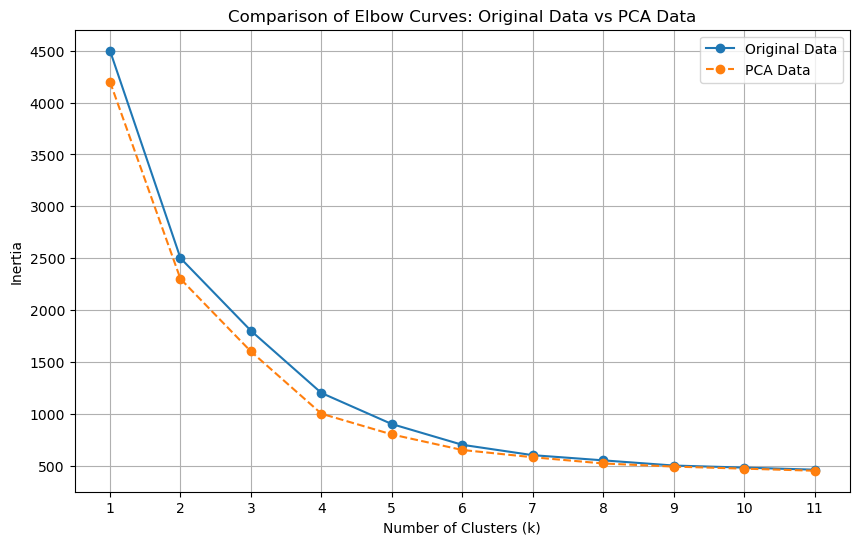

In [42]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt

# Example data: Elbow curve for original data and PCA-transformed data
# Replace these with actual computed inertia values
k_values = list(range(1, 12))  # k-values from 1 to 11
inertia_original = [4500, 2500, 1800, 1200, 900, 700, 600, 550, 500, 480, 460]  # Replace with actual values
inertia_pca = [4200, 2300, 1600, 1000, 800, 650, 580, 520, 490, 470, 450]  # Replace with actual values

# Plot the Elbow Curve for the original data
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_original, marker='o', linestyle='-', label='Original Data')
plt.plot(k_values, inertia_pca, marker='o', linestyle='--', label='PCA Data')

# Add titles, labels, and legend
plt.title("Comparison of Elbow Curves: Original Data vs PCA Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


In [43]:
# Composite plot to contrast the clusters
import hvplot.pandas

# Create scatter plot for original data clusters
scatter_original = df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",  
    y="price_change_percentage_7d",  
    c="Cluster",                     
    colormap="viridis",
    hover_cols=["crypto_name"],      # Include cryptocurrency names in hover
    title="Clusters Based on Original Data",
    width=500,
    height=500
)

# Create scatter plot for PCA data clusters
scatter_pca = df_pca_copy.hvplot.scatter(
    x="Principal Component 1",
    y="Principal Component 2",
    c="Predicted Cluster",           # Colour points by PCA cluster labels
    colormap="viridis",
    hover_cols=["crypto_name"],      # Include cryptocurrency names in hover
    title="Clusters Based on PCA Data",
    width=500,
    height=500
)

# Composite plot: side-by-side scatter plots
composite_plot = scatter_original + scatter_pca

# Display the composite plot
composite_plot


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,crypto_name)
   .Scatter.II :Scatter   [Principal Component 1]   (Principal Component 2,Predicted Cluster,crypto_name)

#### Answer the following question: 

  * **Question:** After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features with K-Means makes clustering faster and focuses on the most important patterns, while also making visualization easier. However, it can lose some detailed information and make clusters harder to interpret because they are based on combined features rather than the original ones. If the clusters are similar to those from the original data, using fewer features is a good choice; otherwise, it may not capture all meaningful details.